## Data Science Tools 1 - Final Project
#### Data Analysis: AQI Values and Wildfires 2019-2024
- AQI by category
- AQI by pollutant: Ozone and PM2.5
- AQI by season
- Changes of AQI Values over year
- Changes of wildfires over year

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Define the directory path for AQI data
data_dir = '../data/aqi_data/aqi_processed'

# Load the CSV files into DataFrames
df1_oz = pd.read_csv(f'{data_dir}/ozone_aqi_2019_2024.csv')
df2_pm25 = pd.read_csv(f'{data_dir}/pm25_aqi_2019_2024.csv')

# Display basic information about the datasets
print("1st Data File:")
print(df1_oz.info())
print(df1_oz.head().to_string(index=False, max_cols=None))  # Display all columns in one line

print("\n2nd Data File:")
print(df2_pm25.info())
print(df2_pm25.head().to_string(index=False, max_cols=None)) 

1st Data File:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425395 entries, 0 to 1425394
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Latitude            1425395 non-null  float64
 1   Longitude           1425395 non-null  float64
 2   SiteName            1425395 non-null  object 
 3   Date                1425395 non-null  object 
 4   Month               1425395 non-null  int64  
 5   Year                1425395 non-null  int64  
 6   Parameter           1425395 non-null  object 
 7   AQI                 1270374 non-null  float64
 8   County              1425395 non-null  object 
 9   Season              1425395 non-null  object 
 10  AQI_Category        1425395 non-null  object 
 11  Wildfire_In_County  1425395 non-null  bool   
 12  Rolling_AQI         1297111 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 131.9+ MB
None
 Latitude   Longitude SiteNam

In [83]:
# AQI Category Counts
print(df1_oz['AQI_Category'].value_counts())
print("\n")
print(df2_pm25['AQI_Category'].value_counts())

AQI_Category
Good                              1175904
Unknown                            155021
Moderate                            88429
Unhealthy for Sensitive Groups       5734
Unhealthy                             304
Very Unhealthy                          3
Name: count, dtype: int64


AQI_Category
Good                              590176
Moderate                          154314
Unhealthy for Sensitive Groups      4040
Unknown                             1666
Unhealthy                           1247
Very Unhealthy                        36
Hazardous                             12
Name: count, dtype: int64


In [84]:
# Exclude 'Unknown' and calculate percentages for AQI_Category 
df1_filtered = df1_oz[df1_oz['AQI_Category'] != 'Unknown']
df1_oz_category_counts = df1_filtered['AQI_Category'].value_counts(normalize=True) * 100
print(df1_oz_category_counts,"\n")

df2_filtered = df2_pm25[df2_pm25['AQI_Category'] != 'Unknown']
df2_pm25_category_counts = df2_filtered['AQI_Category'].value_counts(normalize=True) * 100
print(df2_pm25_category_counts)

AQI_Category
Good                              92.563607
Moderate                           6.960863
Unhealthy for Sensitive Groups     0.451363
Unhealthy                          0.023930
Very Unhealthy                     0.000236
Name: proportion, dtype: float64 

AQI_Category
Good                              78.708499
Moderate                          20.580002
Unhealthy for Sensitive Groups     0.538792
Unhealthy                          0.166305
Very Unhealthy                     0.004801
Hazardous                          0.001600
Name: proportion, dtype: float64


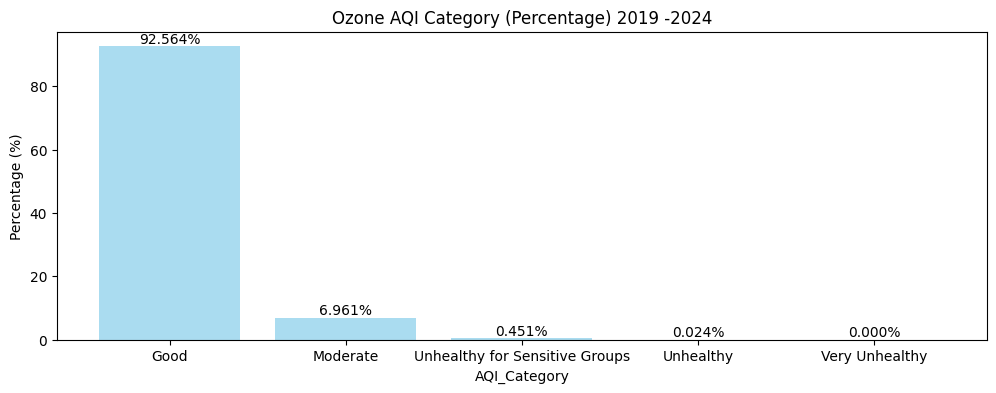

In [86]:
import matplotlib.pyplot as plt

# Create a bar chart for df1_oz
plt.figure(figsize=(12, 4))
bars = plt.bar(df1_oz_category_counts.index, df1_oz_category_counts.values, alpha=0.7, color='skyblue', label='CSV 1')
plt.title('Ozone AQI Category (Percentage) 2019 -2024')
plt.xlabel('AQI_Category')
plt.ylabel('Percentage (%)')

# Display percentage above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}%', ha='center', va='bottom')

plt.show()

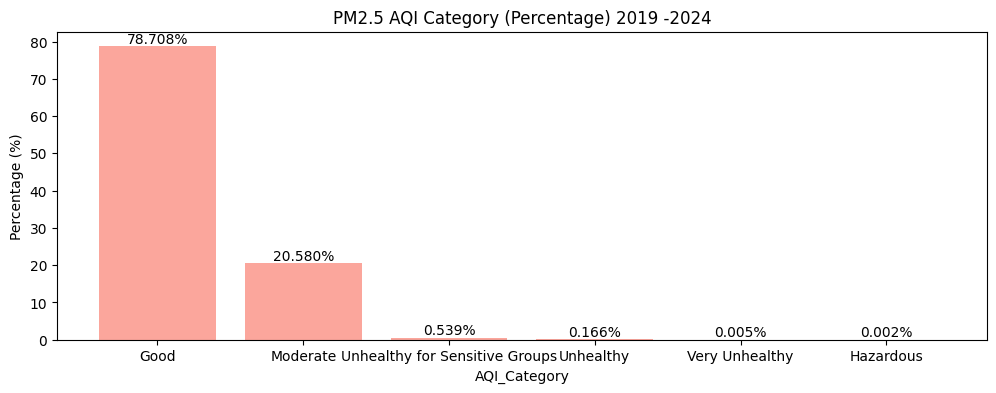

In [87]:
# Create a bar chart for df2_pm25
plt.figure(figsize=(12, 4))
bars = plt.bar(df2_pm25_category_counts.index, df2_pm25_category_counts.values, alpha=0.7, color='salmon', label='CSV 2')
plt.title('PM2.5 AQI Category (Percentage) 2019 -2024')
plt.xlabel('AQI_Category')
plt.ylabel('Percentage (%)')

# Display percentage above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}%', ha='center', va='bottom')

plt.show()

In [88]:
# Season Category Counts
print(df1_oz['Season'].value_counts())
print("\n")
print(df2_pm25['Season'].value_counts())

Season
Fall      364617
Summer    361001
Spring    354793
Winter    344984
Name: count, dtype: int64


Season
Summer    194617
Fall      190849
Spring    186064
Winter    179961
Name: count, dtype: int64


In [89]:
# Define a mapping for the new Season values to show data in a nice order
season_mapping = {
    'Spring': '1-Spring',
    'Summer': '2-Summer',
    'Fall': '3-Fall',
    'Winter': '4-Winter'
}

# Add Season2 column to df1_oz
df1_oz['Season2'] = df1_oz['Season'].map(season_mapping)

# Add Season2 column to df2_pm25
df2_pm25['Season2'] = df2_pm25['Season'].map(season_mapping)

# Check the changes
print(df1_oz[['Season', 'Season2']].head())
print(df2_pm25[['Season', 'Season2']].head())

   Season   Season2
0  Winter  4-Winter
1  Winter  4-Winter
2  Winter  4-Winter
3  Winter  4-Winter
4  Winter  4-Winter
   Season   Season2
0  Winter  4-Winter
1  Winter  4-Winter
2  Winter  4-Winter
3  Winter  4-Winter
4  Winter  4-Winter


In [90]:
# Exclude 'Unknown' and calculate percentages for AQI_Category by season for df1_oz
df1_filtered = df1_oz[df1_oz['AQI_Category'] != 'Unknown']
df1_season_category_counts = df1_filtered.groupby(['Season2', 'AQI_Category']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


print("AQI_Category Percentages by Season - df1_oz:")
print(df1_season_category_counts, "\n")

AQI_Category Percentages by Season - df1_oz:
Season2   Season2   AQI_Category                  
1-Spring  1-Spring  Good                              92.062128
                    Moderate                           7.869574
                    Unhealthy                          0.001699
                    Unhealthy for Sensitive Groups     0.066599
2-Summer  2-Summer  Good                              81.701887
                    Moderate                          16.591417
                    Unhealthy                          0.087739
                    Unhealthy for Sensitive Groups     1.618020
                    Very Unhealthy                     0.000937
3-Fall    3-Fall    Good                              96.673095
                    Moderate                           3.229338
                    Unhealthy                          0.003120
                    Unhealthy for Sensitive Groups     0.094447
4-Winter  4-Winter  Good                              99.744087
        

In [91]:
# Exclude 'Unknown' and calculate percentages for AQI_Category by season for df2_pm25
df2_filtered = df2_pm25[df2_pm25['AQI_Category'] != 'Unknown']
df2_season_category_counts = df2_filtered.groupby(['Season2', 'AQI_Category']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print("AQI_Category Percentages by Season - df2_pm25:")
print(df2_season_category_counts)

AQI_Category Percentages by Season - df2_pm25:
Season2   Season2   AQI_Category                  
1-Spring  1-Spring  Good                              85.652038
                    Moderate                          13.585832
                    Unhealthy                          0.315085
                    Unhealthy for Sensitive Groups     0.440581
                    Very Unhealthy                     0.006463
2-Summer  2-Summer  Good                              77.476503
                    Moderate                          21.590318
                    Unhealthy                          0.175100
                    Unhealthy for Sensitive Groups     0.757564
                    Very Unhealthy                     0.000515
3-Fall    3-Fall    Good                              76.135832
                    Hazardous                          0.006305
                    Moderate                          23.025068
                    Unhealthy                          0.157627
      

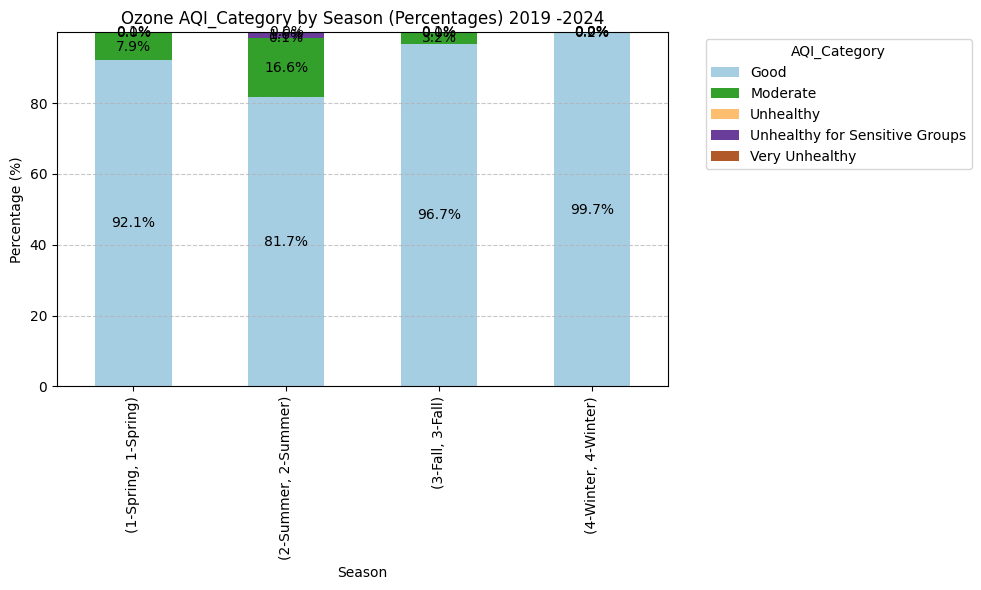

In [ ]:
# Exclude 'Unknown' and calculate percentages for AQI_Category by season for df1_oz
df1_filtered = df1_oz[df1_oz['AQI_Category'] != 'Unknown']
df1_season_category_counts = df1_filtered.groupby(['Season2', 'AQI_Category']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plot stacked bar chart for df1_oz
ax = df1_season_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Ozone AQI_Category by Season (Percentages) 2019 -2024')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='AQI_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage values on each bar
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{v:.1f}%' if v > 0 else '' for v in bars.datavalues], label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

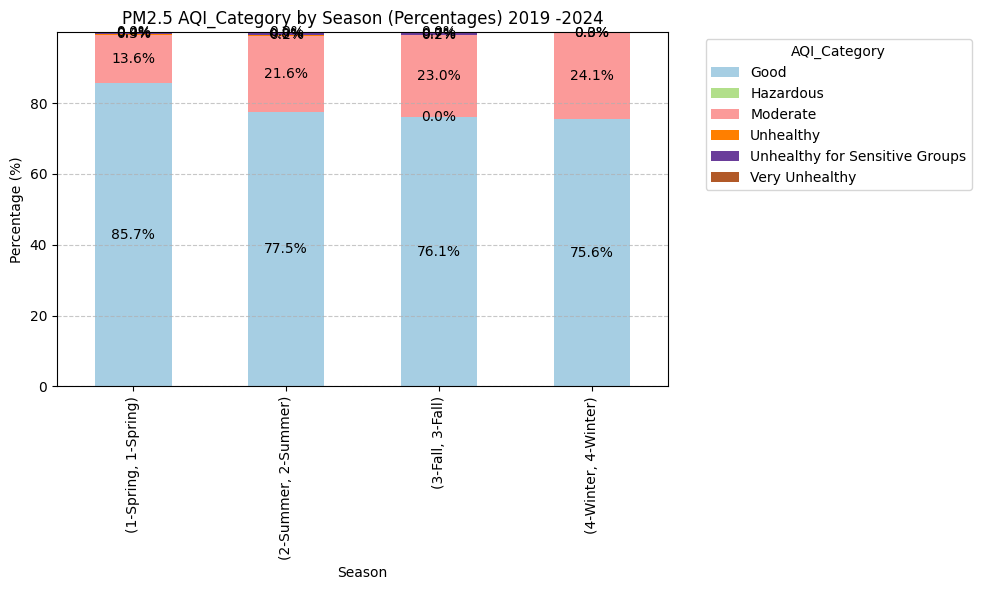

In [ ]:
# Exclude 'Unknown' and calculate percentages for AQI_Category by season for df2_pm25
df2_filtered = df2_pm25[df2_pm25['AQI_Category'].str.strip().str.lower() != 'unknown']
df2_season_category_counts = df2_filtered.groupby(['Season2', 'AQI_Category']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plot stacked bar chart for df2_pm25
ax = df2_season_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('PM2.5 AQI_Category by Season (Percentages) 2019 -2024')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='AQI_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage values on each bar
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{v:.1f}%' if v > 0 else '' for v in bars.datavalues], label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

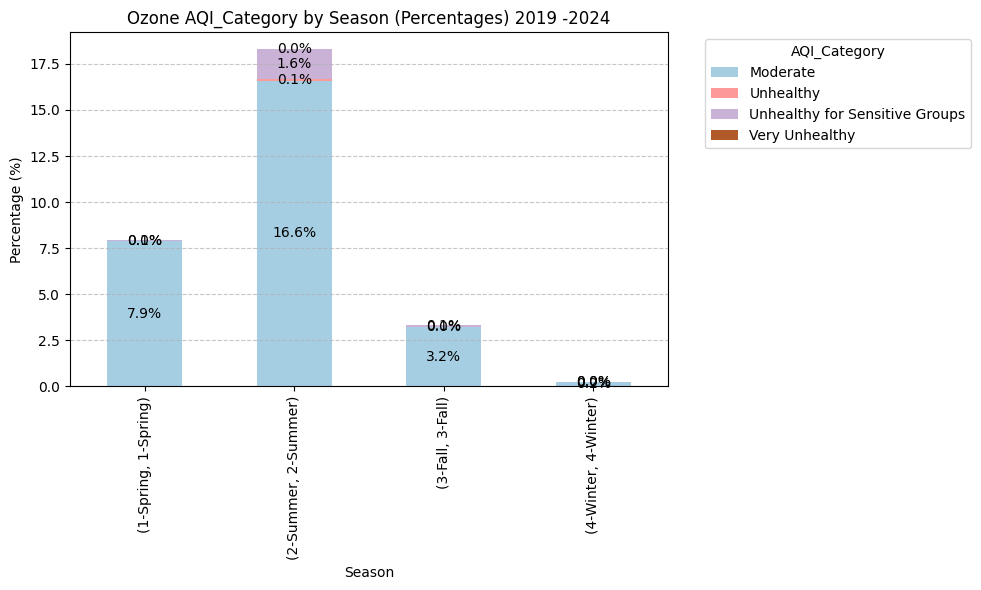

In [125]:
# Exclude 'Unknown' and 'Good' from AQI_Category and calculate percentages for AQI_Category by season for df1_oz
df1_filtered = df1_oz[df1_oz['AQI_Category'] != 'Unknown']
# df1_filtered = df1_oz[~df1_oz['AQI_Category'].isin(['Unknown', 'Good'])]

df1_season_category_counts = (
    df1_filtered.groupby(['Season2', 'AQI_Category']).size()
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
)

# Filter out columns "Unknown" and "Good" without using drop()
df1_season_category_counts_2 = df1_season_category_counts.loc[:, ~df1_season_category_counts.columns.isin(['Good'])]

# Plot stacked bar chart for df1_oz
ax = df1_season_category_counts_2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Ozone AQI_Category by Season (Percentages) 2019 -2024')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='AQI_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage values on each bar
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{v:.1f}%' if v > 0 else '' for v in bars.datavalues], label_type='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

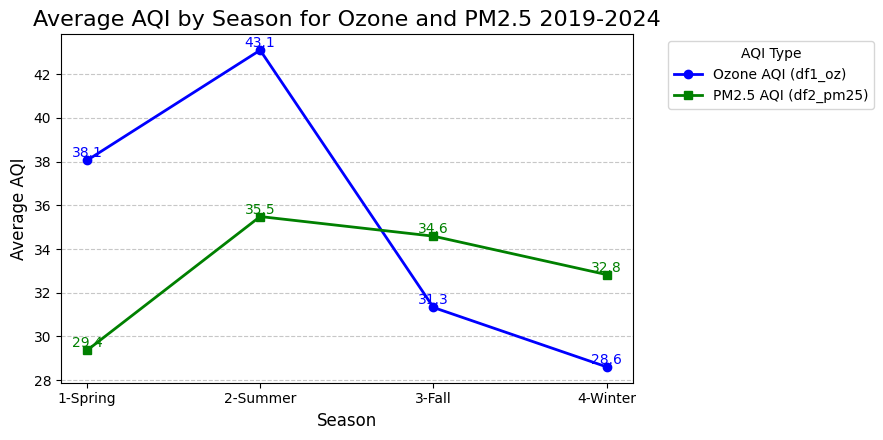

In [105]:
import matplotlib.pyplot as plt

# Calculate the average AQI by Season2 for df1_oz
df1_season_avg_aqi = df1_oz.groupby('Season2')['AQI'].mean()

# Calculate the average AQI by Season2 for df2_pm25
df2_season_avg_aqi = df2_pm25.groupby('Season2')['AQI'].mean()

# Plot line chart comparing AQI by Season2 for both dataframes
plt.figure(figsize=(9, 4.5))

# Plot df1_oz line
plt.plot(df1_season_avg_aqi.index, df1_season_avg_aqi, marker='o', label='Ozone AQI (df1_oz)', color='b', linestyle='-', linewidth=2)

# Plot df2_pm25 line
plt.plot(df2_season_avg_aqi.index, df2_season_avg_aqi, marker='s', label='PM2.5 AQI (df2_pm25)', color='g', linestyle='-', linewidth=2)

# Display AQI values for df1_oz line
for i, val in enumerate(df1_season_avg_aqi):
    plt.text(df1_season_avg_aqi.index[i], val, f'{val:.1f}', color='b', ha='center', va='bottom', fontsize=10)

# Display AQI values for df2_pm25 line
for i, val in enumerate(df2_season_avg_aqi):
    plt.text(df2_season_avg_aqi.index[i], val, f'{val:.1f}', color='g', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average AQI by Season for Ozone and PM2.5 2019-2024', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='AQI Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


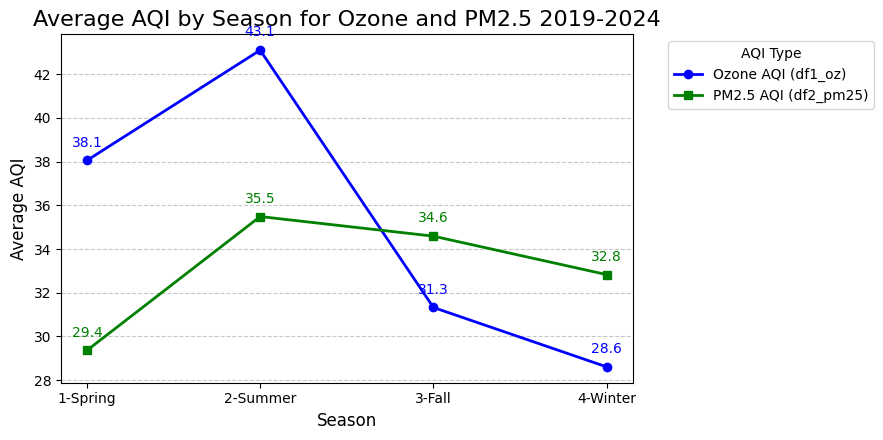

In [106]:
import matplotlib.pyplot as plt

# Calculate the average AQI by Season2 
df1_season_avg_aqi = df1_oz.groupby('Season2')['AQI'].mean()
df2_season_avg_aqi = df2_pm25.groupby('Season2')['AQI'].mean()

# Plot line chart comparing AQI by Season2 for both dataframes
plt.figure(figsize=(9, 4.5))

# Plot  line
plt.plot(df1_season_avg_aqi.index, df1_season_avg_aqi, marker='o', label='Ozone AQI (df1_oz)', color='b', linestyle='-', linewidth=2)
plt.plot(df2_season_avg_aqi.index, df2_season_avg_aqi, marker='s', label='PM2.5 AQI (df2_pm25)', color='g', linestyle='-', linewidth=2)

# Display AQI values for df1_oz line
for i, val in enumerate(df1_season_avg_aqi):
    # Adjust text position to avoid overlap
    plt.text(df1_season_avg_aqi.index[i], val + 0.5, f'{val:.1f}', color='b', ha='center', va='bottom', fontsize=10)

# Display AQI values for df2_pm25 line
for i, val in enumerate(df2_season_avg_aqi):
    # Adjust text position to avoid overlap
    plt.text(df2_season_avg_aqi.index[i], val + 0.5, f'{val:.1f}', color='g', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average AQI by Season for Ozone and PM2.5 2019-2024', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='AQI Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Season2   1-Spring   2-Summer     3-Fall   4-Winter
Year                                               
2019           NaN  39.410969  30.215185  25.417717
2020     36.169246  41.728422  30.326488  28.363358
2021     36.125000  47.349464  32.935550  28.343183
2022     38.182308  41.798292  30.237126  29.178698
2023     39.583154  40.059841  31.196602  29.451991
2024     39.774130  45.628121  32.708865  28.655433


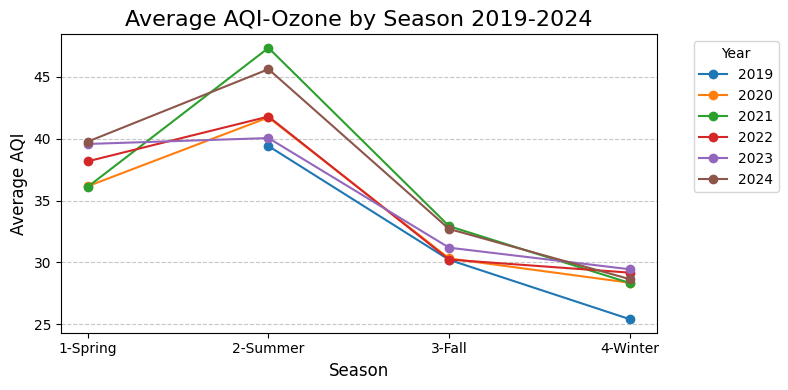

In [107]:
# Group AQI by Year and then by Season2 for df1_oz
df1_oz_year_season_avg_aqi = df1_oz.groupby(['Year', 'Season2'])['AQI'].mean().unstack()
print(df1_oz_year_season_avg_aqi)

# Plot AQI by Year and Season for df1_oz
plt.figure(figsize=(8,4))

# Plot each year as a line
for year in df1_oz_year_season_avg_aqi.index:
    plt.plot(df1_oz_year_season_avg_aqi.columns, df1_oz_year_season_avg_aqi.loc[year], marker='o', label=f'{year}')

# Customize the plot
plt.title('Average AQI-Ozone by Season 2019-2024', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Year       2019   2020   2021   2022   2023   2024
Season2                                           
1-Spring    NaN  36.17  36.12  38.18  39.58  39.77
2-Summer  39.41  41.73  47.35  41.80  40.06  45.63
3-Fall    30.22  30.33  32.94  30.24  31.20  32.71
4-Winter  25.42  28.36  28.34  29.18  29.45  28.66


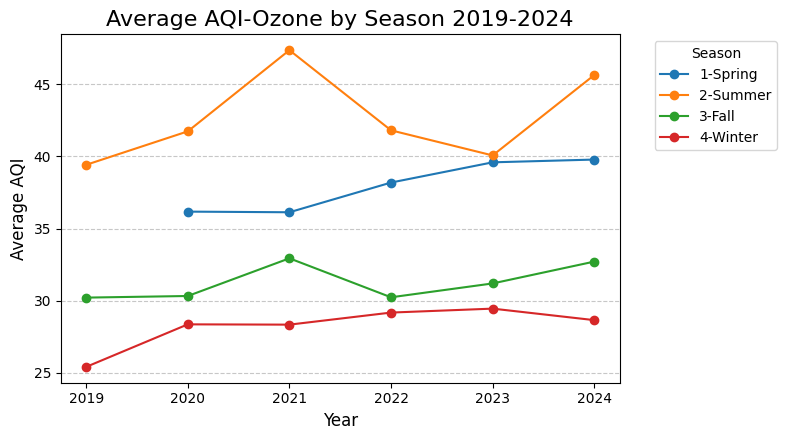

In [112]:
# Group AQI by Year and then by Season2 for df1_oz
df1_oz_year_season_avg_aqi = df1_oz.groupby(['Season2', 'Year'])['AQI'].mean().unstack()
print(df1_oz_year_season_avg_aqi.round(2))  # Round to 2 decimals

# Plot AQI by Year and Season for df1_oz
plt.figure(figsize=(8, 4.5))

# Plot each year as a line
for year in df1_oz_year_season_avg_aqi.index:
    plt.plot(df1_oz_year_season_avg_aqi.columns, df1_oz_year_season_avg_aqi.loc[year], marker='o', label=f'{year}')

# Customize the plot
plt.title('Average AQI-Ozone by Season 2019-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Average AQI by Season2 and Year (df2_pm25):
Year       2019   2020   2021   2022   2023   2024
Season2                                           
1-Spring  32.19  27.68  32.51  30.44  31.02  23.08
2-Summer  32.14  39.99  49.85  28.83  32.28  32.13
3-Fall    33.37  45.80  34.97  30.51  29.68  34.41
4-Winter  39.15  31.91  33.39  33.03  32.38  28.44


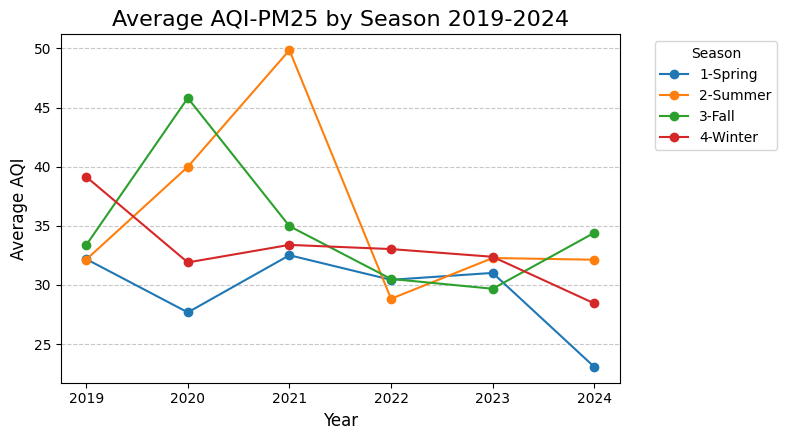

In [113]:
# Group AQI by Year and then by Season2 for df2_pm25
df2_pm25_year_season_avg_aqi = df2_pm25.groupby(['Season2', 'Year'])['AQI'].mean().unstack()

# Print the average AQI values with 2 decimal places
print("Average AQI by Season2 and Year (df2_pm25):")
print(df2_pm25_year_season_avg_aqi.round(2))  # Round to 2 decimals

# Plot AQI by Year and Season for df2_pm25
plt.figure(figsize=(8, 4.5))

# Plot each year as a line
for year in df2_pm25_year_season_avg_aqi.index:
    plt.plot(df2_pm25_year_season_avg_aqi.columns, df2_pm25_year_season_avg_aqi.loc[year], marker='o', label=f'{year}')

# Customize the plot
plt.title('Average AQI-PM25 by Season 2019-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [115]:
# Define the directory path for AQI data
data_dir2_fire_ = '../data/wildfire_data/wildfire_processed'

# Load the wildfire file into DataFrames
df3_fire = pd.read_csv(f'{data_dir2_fire_}/wildfire_processed_2019_2024.csv')

# Display basic information about wildfire
print("Wildfire Data File:")
print(df3_fire.info())
print(df3_fire.head().to_string(index=False, max_cols=None))  # Display all columns in one line


Wildfire Data File:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9279 entries, 0 to 9278
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    9279 non-null   float64
 1   longitude   9279 non-null   float64
 2   acq_date    9279 non-null   object 
 3   frp         9279 non-null   float64
 4   confidence  9279 non-null   int64  
 5   type        9279 non-null   int64  
 6   Year        9279 non-null   int64  
 7   Month       9279 non-null   int64  
 8   Season      9279 non-null   object 
 9   County      0 non-null      float64
dtypes: float64(4), int64(4), object(2)
memory usage: 725.1+ KB
None
 latitude  longitude   acq_date  frp  confidence  type  Year  Month Season  County
  40.7070  -103.1197 2019-01-05 53.2          81     0  2019      1 Winter     NaN
  37.0882  -105.0840 2019-01-08 24.3          77     0  2019      1 Winter     NaN
  38.1084  -103.8768 2019-01-29 11.2          57     0  2019   

In [117]:
# Define a mapping for the new Season values to show data in a nice order
season_mapping = {
    'Spring': '1-Spring',
    'Summer': '2-Summer',
    'Fall': '3-Fall',
    'Winter': '4-Winter'
}

# Add Season2 column to df3_fire
df3_fire['Season2'] = df3_fire['Season'].map(season_mapping)
# Check the changes
print(df3_fire[['Season', 'Season2']].head())

   Season   Season2
0  Winter  4-Winter
1  Winter  4-Winter
2  Winter  4-Winter
3  Winter  4-Winter
4  Winter  4-Winter


Average Wildfire Confidence by Season and Year (df3_fire):
Year       2019   2020   2021   2022   2023   2024
Season2                                           
1-Spring  68.70  74.26  68.39  73.22  65.70  67.05
2-Summer  72.82  78.90  80.17  68.43  69.17  77.34
3-Fall    74.09  80.35  72.51  71.35  69.30  66.09
4-Winter  63.48  63.81  67.77  63.05  65.53  65.57


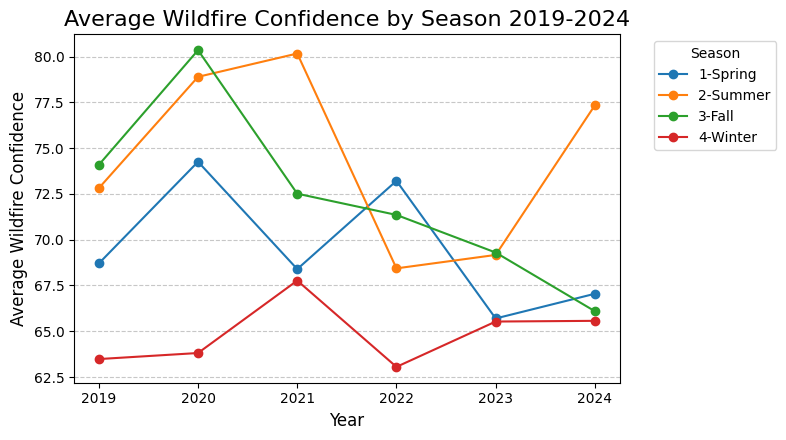

In [120]:
# Group AQI by Year and Season2 for df3_fire
df3_fire_year_season_avg_aqi = df3_fire.groupby(['Season2', 'Year'])['confidence'].mean().unstack()

# Print the average confidence values with 2 decimal places
print("Average Wildfire Confidence by Season and Year (df3_fire):")
print(df3_fire_year_season_avg_aqi.round(2))  # Round to 2 decimals

# Plot AQI by Year and Season for df3_fire
plt.figure(figsize=(8, 4.5))

# Plot each season as a line
for season in df3_fire_year_season_avg_aqi.index:
    plt.plot(df3_fire_year_season_avg_aqi.columns, 
             df3_fire_year_season_avg_aqi.loc[season], 
             marker='o', label=f'{season}')

# Customize the plot
plt.title('Average Wildfire Confidence by Season 2019-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wildfire Confidence', fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
